In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split




In [138]:
original_df=pd.read_csv("pyrolysis.csv")
anushka_df=pd.read_csv("pyrolysis.csv")

In [139]:
anushka_df.shape

(751, 17)

In [140]:
anushka_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            751 non-null    int64  
 1   Biomass species  751 non-null    object 
 2   M                632 non-null    float64
 3   Ash              733 non-null    float64
 4   VM               683 non-null    float64
 5   FC               683 non-null    float64
 6   C                748 non-null    float64
 7   H                748 non-null    float64
 8   O                748 non-null    float64
 9   N                721 non-null    float64
 10  PS               650 non-null    object 
 11  FT               751 non-null    int64  
 12  HR               641 non-null    float64
 13  FR               570 non-null    float64
 14  Solid phase      742 non-null    object 
 15  Liquid phase     715 non-null    object 
 16  Gas phase        715 non-null    object 
dtypes: float64(10), 

In [141]:
columns_to_convert = ['PS', 'Solid phase', 'Liquid phase', 'Gas phase']
anushka_df[columns_to_convert] = anushka_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [142]:
anushka_df.dtypes

Index                int64
Biomass species     object
M                  float64
Ash                float64
VM                 float64
FC                 float64
C                  float64
H                  float64
O                  float64
N                  float64
PS                 float64
FT                   int64
HR                 float64
FR                 float64
Solid phase        float64
Liquid phase       float64
Gas phase          float64
dtype: object

In [143]:
duplicate_count=anushka_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

anushka_df.drop_duplicates()

Number of duplicate rows: 0


,Index,Biomass species,M,Ash,VM,FC,C,H,O,N,PS,FT,HR,FR,Solid phase,Liquid phase,Gas phase
0,1,Jerusalem artichoke stick,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,0.5,550,10.0,100.0,35.00,44.90,20.10
1,2,Jerusalem artichoke stick,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,0.5,650,10.0,100.0,31.75,41.25,27.00
2,3,Jerusalem artichoke stick,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,0.5,750,10.0,100.0,30.20,40.60,29.20
3,4,Jerusalem artichoke stick,15.76,3.34,67.40,13.50,45.36,6.11,47.26,0.75,0.5,850,10.0,100.0,28.60,36.36,35.04
4,5,reed,5.89,8.47,72.12,13.52,42.78,5.17,50.51,1.33,0.5,550,10.0,100.0,32.85,54.38,12.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,747,Karanja seed,7.27,1.50,89.23,2.00,53.04,7.32,35.53,3.94,0.5,500,20.0,40.0,25.76,50.23,24.80
747,748,Karanja seed,7.27,1.50,89.23,2.00,53.04,7.32,35.53,3.94,0.5,525,20.0,40.0,22.19,53.15,25.06
748,749,Karanja seed,7.27,1.50,89.23,2.00,53.04,7.32,35.53,3.94,0.5,550,20.0,40.0,20.21,55.32,25.64
749,750,Karanja seed,7.27,1.50,89.23,2.00,53.04,7.32,35.53,3.94,0.5,575,20.0,40.0,18.77,51.85,29.51


In [144]:
(anushka_df.isnull().sum())

Index                0
Biomass species      0
M                  119
Ash                 18
VM                  68
FC                  68
C                    3
H                    3
O                    3
N                   30
PS                 115
FT                   0
HR                 110
FR                 181
Solid phase         12
Liquid phase        39
Gas phase           39
dtype: int64

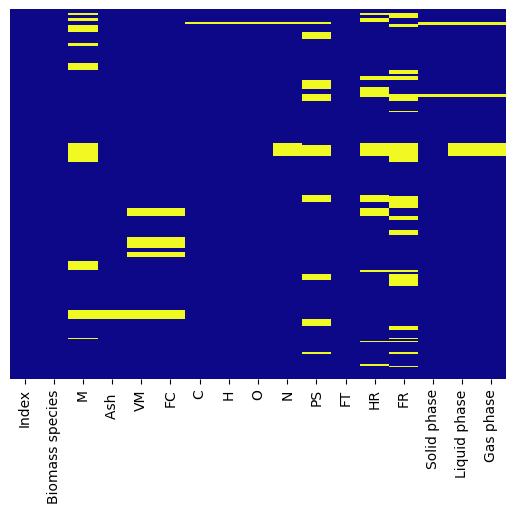

In [145]:
ax = sns.heatmap(anushka_df.isnull(), yticklabels=False, cbar=False,cmap="plasma")

In [146]:
anushka_df.columns

Index(['Index', 'Biomass species', 'M', 'Ash ', 'VM', 'FC', 'C', 'H', 'O', 'N',
       'PS', 'FT', 'HR', 'FR', 'Solid phase', 'Liquid phase', 'Gas phase'],
      dtype='object')

In [ ]:
columns_to_fill = [
    'M', 'Ash ', 'VM', 'FC', 'C', 'H', 'O', 'N',
       'PS', 'FT', 'HR', 'FR', 'Solid phase', 'Liquid phase', 'Gas phase'
]


valid_columns = [col for col in columns_to_fill if col in anushka_df.columns]

# Filling NaN values with mean
anushka_df[valid_columns] = anushka_df[valid_columns].fillna(anushka_df[valid_columns].mean())


In [148]:
anushka_df.head

<bound method NDFrame.head of      Index            Biomass species      M  Ash      VM     FC      C     H  \
0        1  Jerusalem artichoke stick  15.76  3.34  67.40  13.50  45.36  6.11   
1        2  Jerusalem artichoke stick  15.76  3.34  67.40  13.50  45.36  6.11   
2        3  Jerusalem artichoke stick  15.76  3.34  67.40  13.50  45.36  6.11   
3        4  Jerusalem artichoke stick  15.76  3.34  67.40  13.50  45.36  6.11   
4        5                       reed   5.89  8.47  72.12  13.52  42.78  5.17   
..     ...                        ...    ...   ...    ...    ...    ...   ...   
746    747               Karanja seed   7.27  1.50  89.23   2.00  53.04  7.32   
747    748               Karanja seed   7.27  1.50  89.23   2.00  53.04  7.32   
748    749               Karanja seed   7.27  1.50  89.23   2.00  53.04  7.32   
749    750               Karanja seed   7.27  1.50  89.23   2.00  53.04  7.32   
750    751               Karanja seed   7.27  1.50  89.23   2.00  53.04  7.32  

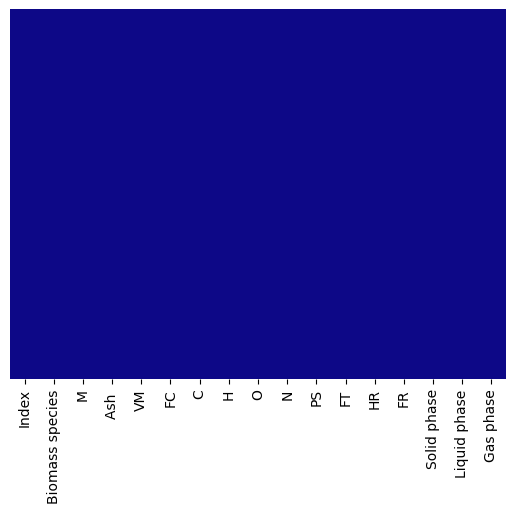

In [149]:
ax = sns.heatmap(anushka_df.isnull(), yticklabels=False, cbar=False,cmap="plasma")

In [150]:
anushka_df = anushka_df.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' else col)


In [151]:
columns_to_drop = ['Unnamed: 0']

anushka_df = anushka_df.drop(columns=columns_to_drop, errors='ignore')

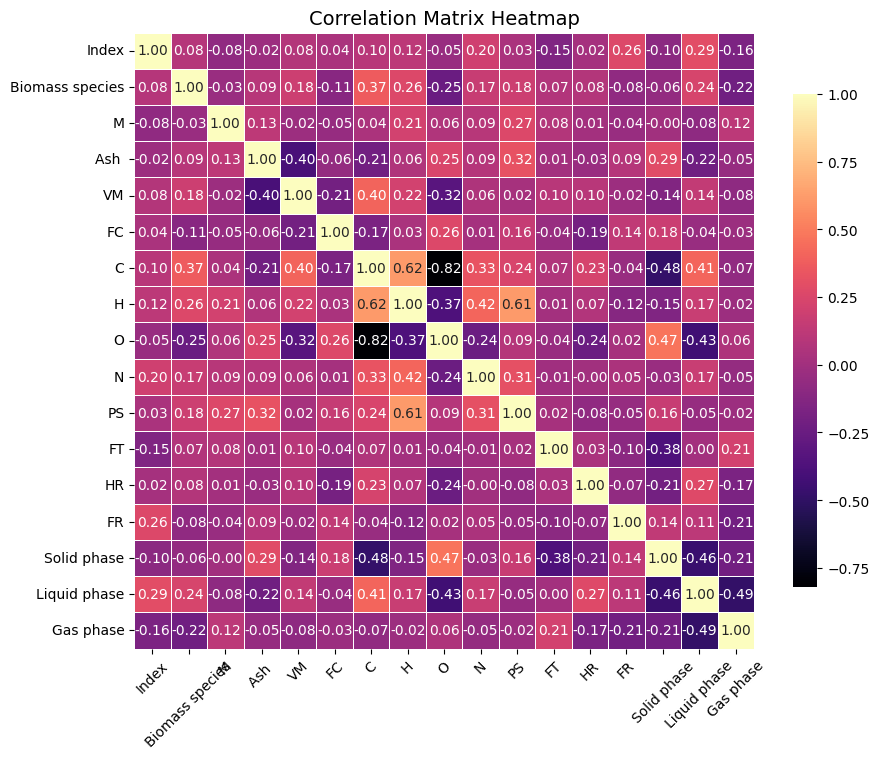

In [ ]:
#correlation matrix
corr_matrix = anushka_df.corr()

# Plots
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma', linewidths=0.7, fmt=".2f", annot_kws={"size": 10},cbar_kws={"shrink": 0.8})

plt.title("Correlation Matrix Heatmap", fontsize=14)  
plt.xticks(fontsize=10, rotation=45)  
plt.yticks(fontsize=10)
plt.show()

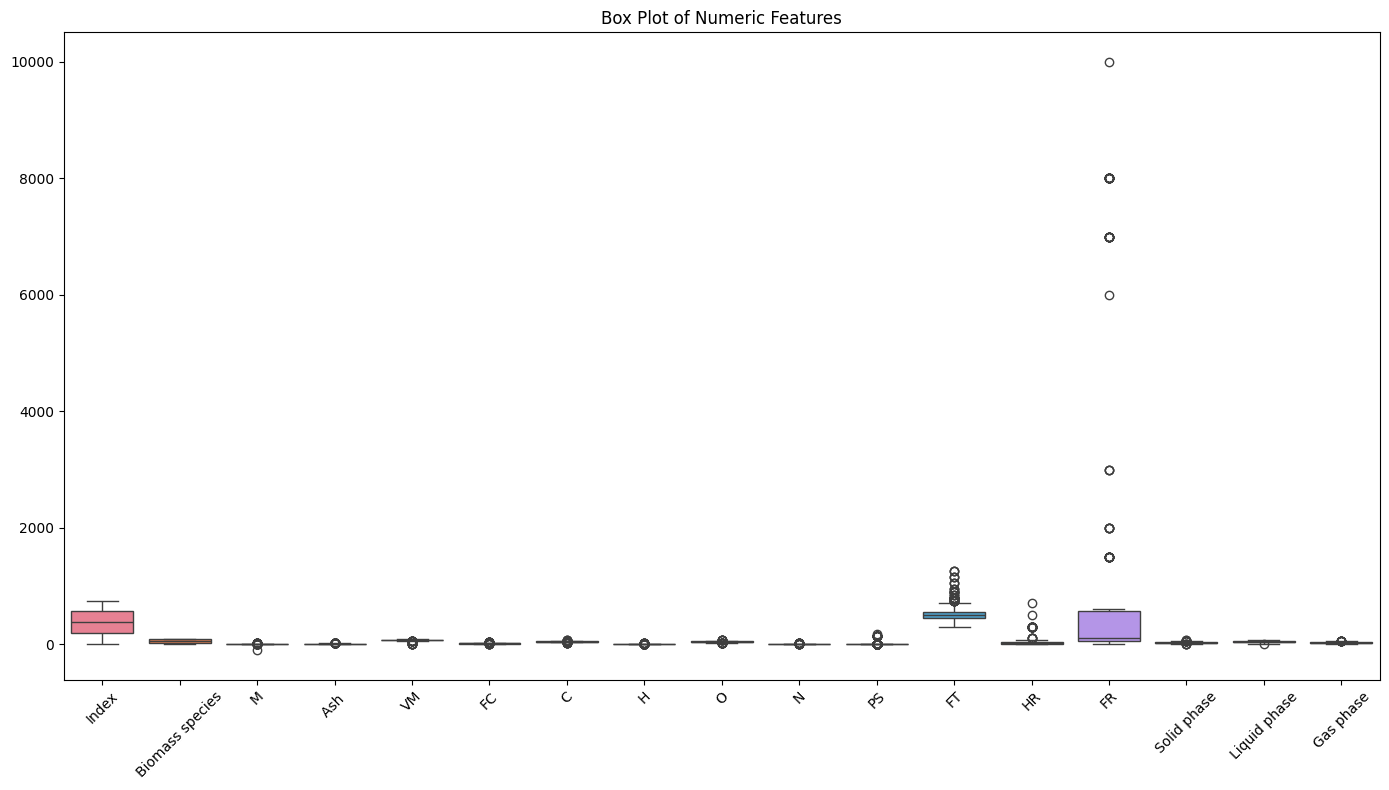

In [158]:

plt.figure(figsize=(14, 8))
sns.boxplot(data=anushka_df)
plt.title("Box Plot of Numeric Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [155]:
def remove_outliers_iqr(anushka_df):
    Q1 = anushka_df.quantile(0.25)
    Q3 = anushka_df.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return anushka_df[~((anushka_df < lower_bound) | (anushka_df > upper_bound)).any(axis=1)]

# Remove outliers
anushka_df_clean = remove_outliers_iqr(anushka_df)

print("\nData after outlier removal:\n")
anushka_df_clean


Data after outlier removal:



,Index,Biomass species,M,Ash,VM,FC,C,H,O,N,PS,FT,HR,FR,Solid phase,Liquid phase,Gas phase
4,5,83,5.890000,8.47,72.12,13.52,42.78,5.17,50.51,1.33,0.50,550,10.000000,100.000000,32.85,54.38,12.77
5,6,83,5.890000,8.47,72.12,13.52,42.78,5.17,50.51,1.33,0.50,650,10.000000,100.000000,30.14,55.56,14.30
9,10,9,6.102753,7.27,75.56,17.17,39.57,5.25,53.20,1.81,0.55,650,39.194228,571.440351,39.26,35.38,25.34
11,12,54,8.120000,0.76,78.95,14.04,52.33,5.81,41.66,0.20,0.30,400,10.000000,571.440351,26.53,33.33,39.73
12,13,54,8.120000,0.76,78.95,14.04,52.33,5.81,41.66,0.20,0.30,500,10.000000,571.440351,24.84,31.64,42.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,747,25,7.270000,1.50,89.23,2.00,53.04,7.32,35.53,3.94,0.50,500,20.000000,40.000000,25.76,50.23,24.80
747,748,25,7.270000,1.50,89.23,2.00,53.04,7.32,35.53,3.94,0.50,525,20.000000,40.000000,22.19,53.15,25.06
748,749,25,7.270000,1.50,89.23,2.00,53.04,7.32,35.53,3.94,0.50,550,20.000000,40.000000,20.21,55.32,25.64
749,750,25,7.270000,1.50,89.23,2.00,53.04,7.32,35.53,3.94,0.50,575,20.000000,40.000000,18.77,51.85,29.51


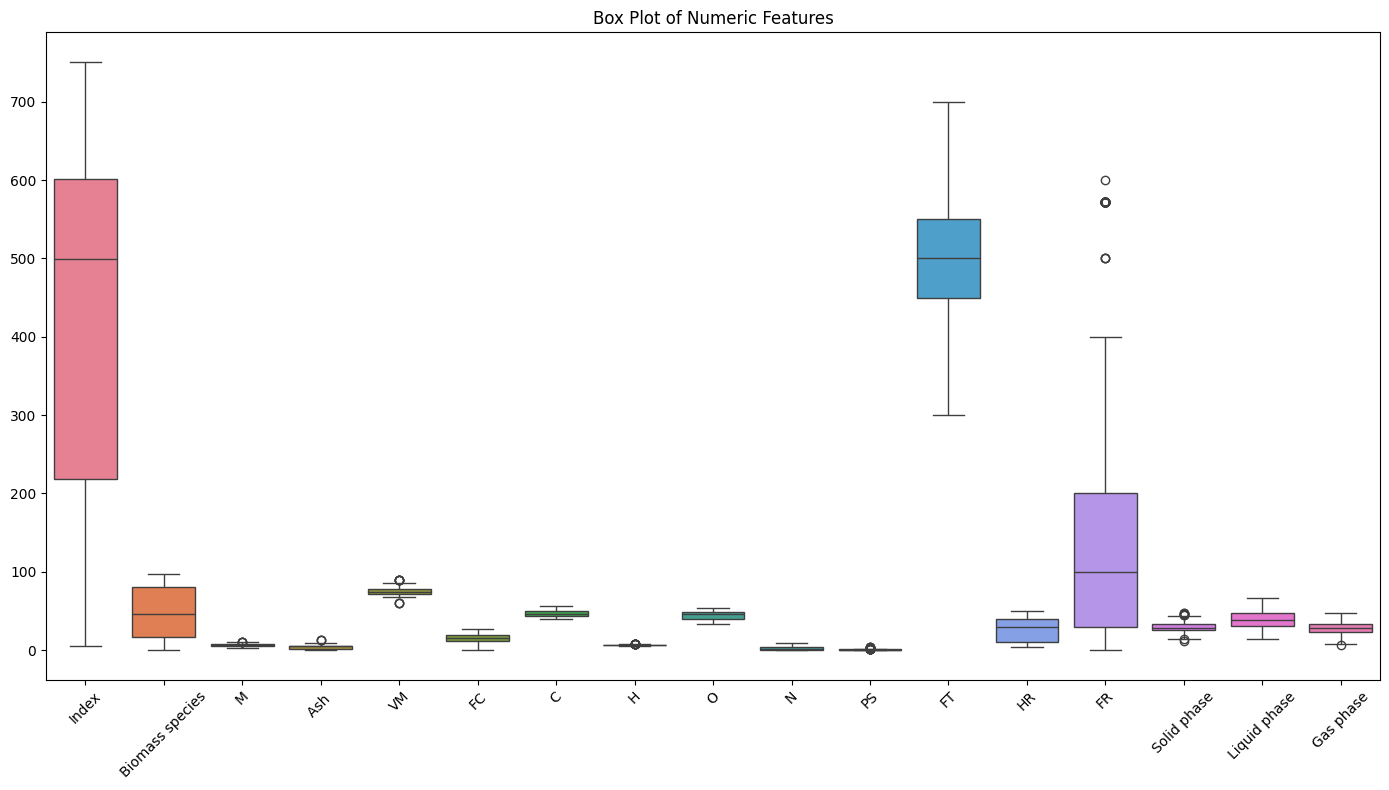

In [157]:

plt.figure(figsize=(14, 8))
sns.boxplot(data=anushka_df_clean)
plt.title("Box Plot of Numeric Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


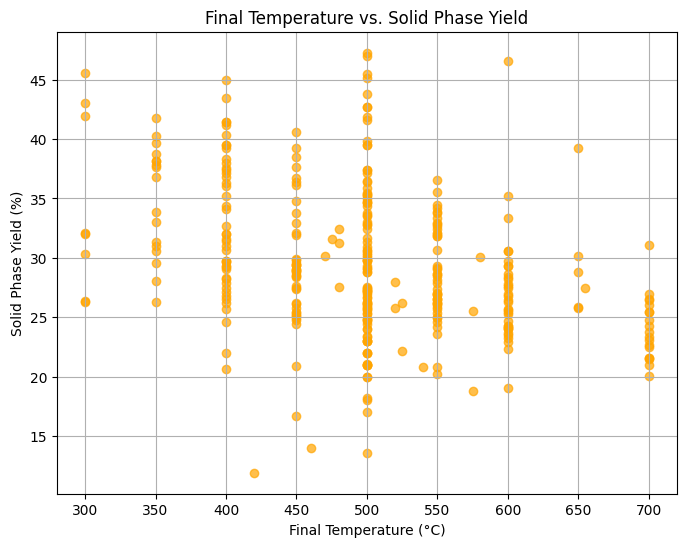

In [156]:
plt.figure(figsize=(8, 6))
plt.scatter(anushka_df_clean['FT'], anushka_df_clean['Solid phase'], alpha=0.7, color='orange')
plt.title('Final Temperature vs. Solid Phase Yield')
plt.xlabel('Final Temperature (°C)')
plt.ylabel('Solid Phase Yield (%)')
plt.grid(True)
plt.show()


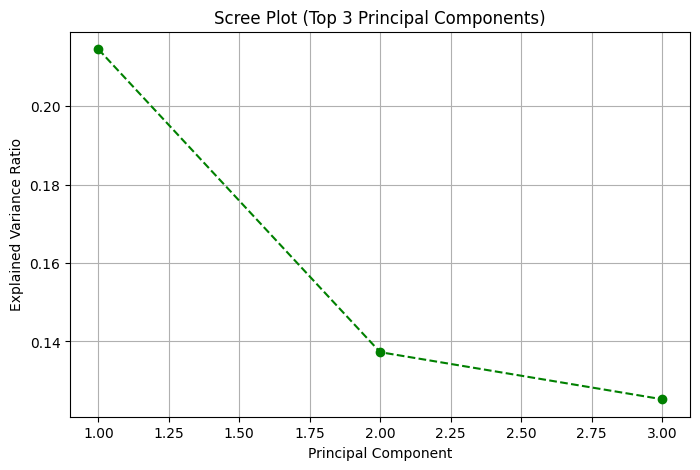

In [ ]:
numeric_cols = anushka_df_clean.select_dtypes(include=['float64', 'int64'])

numeric_filled = numeric_cols.fillna(numeric_cols.mean())

# Apply PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

import matplotlib.pyplot as plt
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(range(1, 4), explained_variance, marker='o', linestyle='--', color='green')
plt.title('Scree Plot (Top 3 Principal Components)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


In [198]:


#linearregression
df = anushka_df_clean.drop(columns=['Index', 'Biomass species']).dropna()

# Split input and output
X = df.drop(columns=['Solid phase', 'Liquid phase', 'Gas phase'])
y = df[['Solid phase', 'Liquid phase', 'Gas phase']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [199]:
# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [200]:

# Evaluation function
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n {model_name} Performance")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.3f}")

# Call the evaluation
evaluate_model(y_test, y_pred, "Linear Regression")


 Linear Regression Performance
MAE : 4.95
MSE : 45.94
RMSE: 6.78
R²  : 0.299


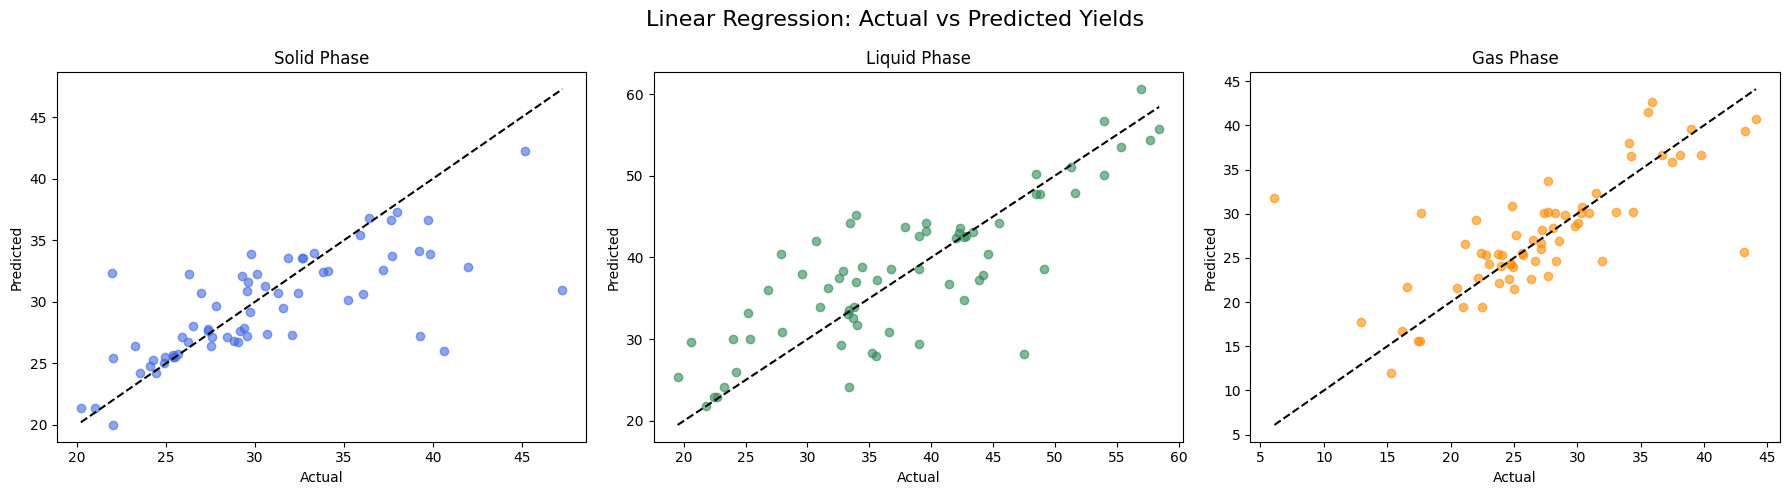

In [ ]:

y_true_solid = y_test['Solid phase']
y_true_liquid = y_test['Liquid phase']
y_true_gas = y_test['Gas phase']

y_pred_solid = y_pred[:, 0]
y_pred_liquid = y_pred[:, 1]
y_pred_gas = y_pred[:, 2]

# Plot all 3 subplots
plt.figure(figsize=(18, 5))

# Solid Phase
plt.subplot(1, 3, 1)
plt.scatter(y_true_solid, y_pred_solid, color='royalblue', alpha=0.6)
plt.plot([y_true_solid.min(), y_true_solid.max()], [y_true_solid.min(), y_true_solid.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Solid Phase')

# Liquid Phase
plt.subplot(1, 3, 2)
plt.scatter(y_true_liquid, y_pred_liquid, color='seagreen', alpha=0.6)
plt.plot([y_true_liquid.min(), y_true_liquid.max()], [y_true_liquid.min(), y_true_liquid.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Liquid Phase')

# Gas Phase
plt.subplot(1, 3, 3)
plt.scatter(y_true_gas, y_pred_gas, color='darkorange', alpha=0.6)
plt.plot([y_true_gas.min(), y_true_gas.max()], [y_true_gas.min(), y_true_gas.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gas Phase')

plt.suptitle('Linear Regression: Actual vs Predicted Yields', fontsize=16)
plt.tight_layout()
plt.show()


In [195]:
#Decisiontreeregression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

# Predict
y_pred = dt.predict(X_test_scaled)

# Evaluate
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n📊 {model_name} Performance")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.3f}")
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}

# Call it
metrics_dt = evaluate_model(y_test, y_pred, "Decision Tree Regressor")




📊 Decision Tree Regressor Performance
MAE : 2.51
MSE : 19.14
RMSE: 4.37
R²  : 0.627


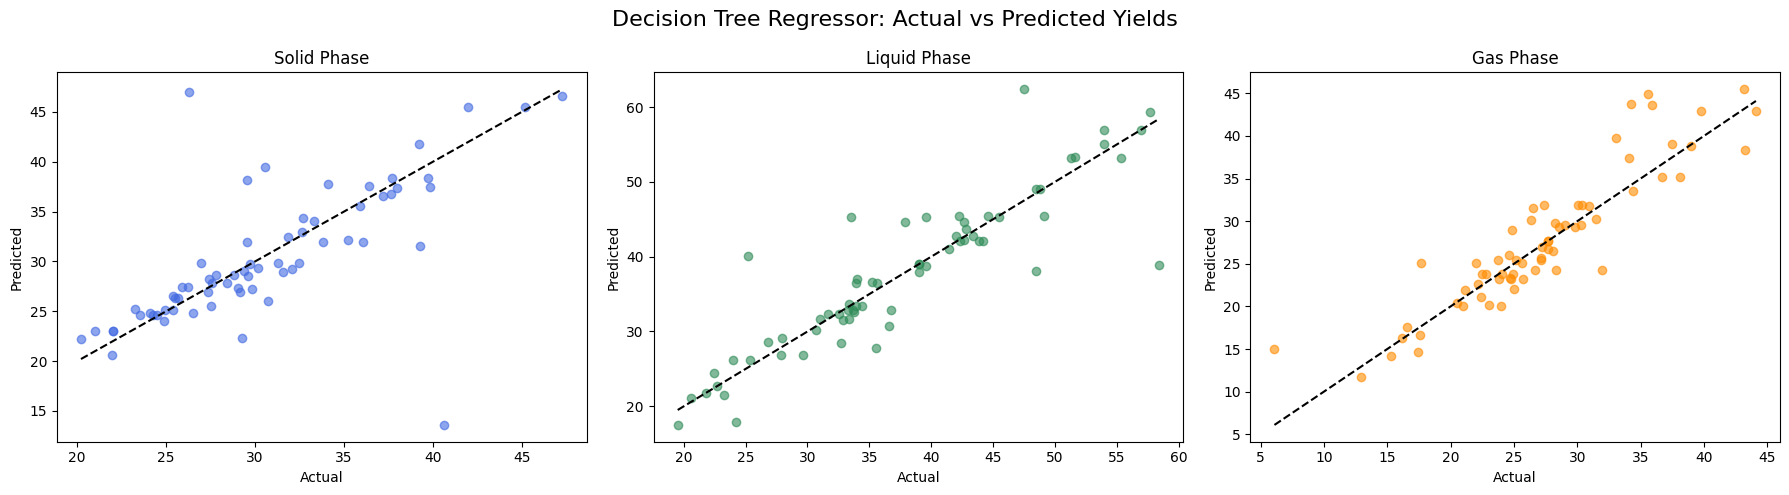

In [190]:
import matplotlib.pyplot as plt

# Predict using Decision Tree
y_pred_dt = dt.predict(X_test_scaled)

# Extract true values
y_true_solid = y_test['Solid phase']
y_true_liquid = y_test['Liquid phase']
y_true_gas = y_test['Gas phase']

# Extract predicted values
y_pred_solid = y_pred_dt[:, 0]
y_pred_liquid = y_pred_dt[:, 1]
y_pred_gas = y_pred_dt[:, 2]

# Plot
plt.figure(figsize=(18, 5))

# Solid Phase
plt.subplot(1, 3, 1)
plt.scatter(y_true_solid, y_pred_solid, color='royalblue', alpha=0.6)
plt.plot([y_true_solid.min(), y_true_solid.max()], [y_true_solid.min(), y_true_solid.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Solid Phase')

# Liquid Phase
plt.subplot(1, 3, 2)
plt.scatter(y_true_liquid, y_pred_liquid, color='seagreen', alpha=0.6)
plt.plot([y_true_liquid.min(), y_true_liquid.max()], [y_true_liquid.min(), y_true_liquid.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Liquid Phase')

# Gas Phase
plt.subplot(1, 3, 3)
plt.scatter(y_true_gas, y_pred_gas, color='darkorange', alpha=0.6)
plt.plot([y_true_gas.min(), y_true_gas.max()], [y_true_gas.min(), y_true_gas.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gas Phase')

plt.suptitle('Decision Tree Regressor: Actual vs Predicted Yields', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [ ]:

y_pred = rf.predict(X_test_scaled)

In [176]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 {model_name} Performance")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.3f}")
    
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}
metrics_rf = evaluate_model(y_test, y_pred, "Random Forest Regressor")


📊 Random Forest Regressor Performance
MAE : 2.28
MSE : 14.29
RMSE: 3.78
R²  : 0.726


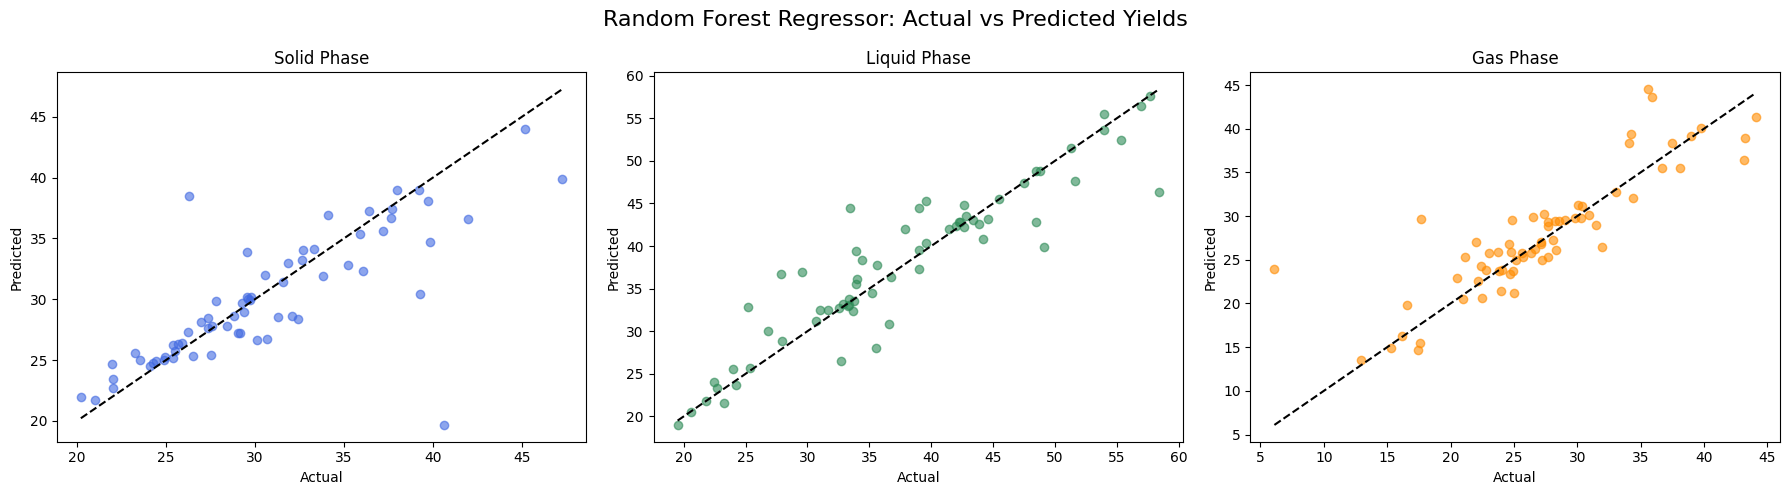

In [191]:
import matplotlib.pyplot as plt

# Predict using Random Forest
y_pred_rf = rf.predict(X_test_scaled)

# Extract true values
y_true_solid = y_test['Solid phase']
y_true_liquid = y_test['Liquid phase']
y_true_gas = y_test['Gas phase']

# Extract predicted values
y_pred_solid = y_pred_rf[:, 0]
y_pred_liquid = y_pred_rf[:, 1]
y_pred_gas = y_pred_rf[:, 2]

# Plot
plt.figure(figsize=(18, 5))

# Solid Phase
plt.subplot(1, 3, 1)
plt.scatter(y_true_solid, y_pred_solid, color='royalblue', alpha=0.6)
plt.plot([y_true_solid.min(), y_true_solid.max()], [y_true_solid.min(), y_true_solid.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Solid Phase')

# Liquid Phase
plt.subplot(1, 3, 2)
plt.scatter(y_true_liquid, y_pred_liquid, color='seagreen', alpha=0.6)
plt.plot([y_true_liquid.min(), y_true_liquid.max()], [y_true_liquid.min(), y_true_liquid.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Liquid Phase')

# Gas Phase
plt.subplot(1, 3, 3)
plt.scatter(y_true_gas, y_pred_gas, color='darkorange', alpha=0.6)
plt.plot([y_true_gas.min(), y_true_gas.max()], [y_true_gas.min(), y_true_gas.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gas Phase')

plt.suptitle('Random Forest Regressor: Actual vs Predicted Yields', fontsize=16)
plt.tight_layout()
plt.show()


In [179]:

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor()

In [180]:
# Predict
y_pred = knn.predict(X_test_scaled)


In [181]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 {model_name} Performance")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²  : {r2:.3f}")

    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}
metrics_knn = evaluate_model(y_test, y_pred, "KNN Regressor")



📊 KNN Regressor Performance
MAE : 3.37
MSE : 25.80
RMSE: 5.08
R²  : 0.554


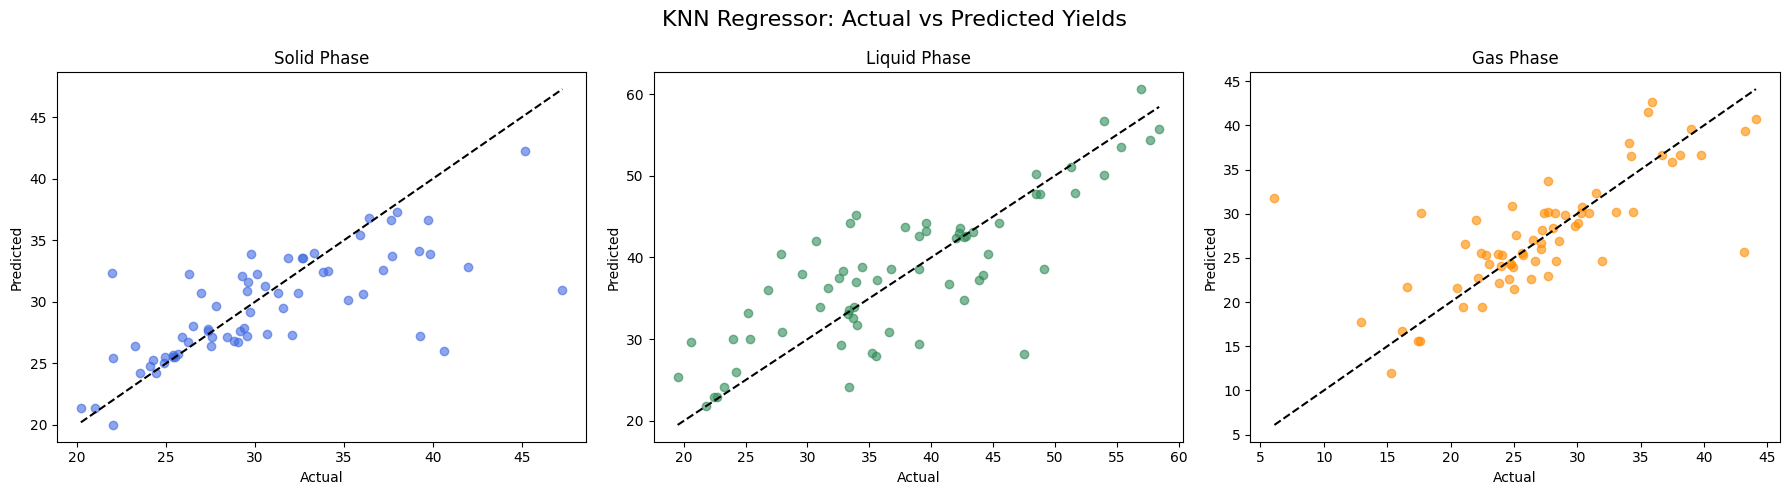

In [194]:
import matplotlib.pyplot as plt

# Predict using KNN
y_pred_knn = knn.predict(X_test_scaled)

# Extract true values
y_true_solid = y_test['Solid phase']
y_true_liquid = y_test['Liquid phase']
y_true_gas = y_test['Gas phase']

y_pred_solid = y_pred_knn[:, 0]
y_pred_liquid = y_pred_knn[:, 1]
y_pred_gas = y_pred_knn[:, 2]

# Plot
plt.figure(figsize=(18, 5))

# Solid Phase
plt.subplot(1, 3, 1)
plt.scatter(y_true_solid, y_pred_solid, color='royalblue', alpha=0.6)
plt.plot([y_true_solid.min(), y_true_solid.max()], [y_true_solid.min(), y_true_solid.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Solid Phase')

# Liquid Phase
plt.subplot(1, 3, 2)
plt.scatter(y_true_liquid, y_pred_liquid, color='seagreen', alpha=0.6)
plt.plot([y_true_liquid.min(), y_true_liquid.max()], [y_true_liquid.min(), y_true_liquid.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Liquid Phase')

# Gas Phase
plt.subplot(1, 3, 3)
plt.scatter(y_true_gas, y_pred_gas, color='darkorange', alpha=0.6)
plt.plot([y_true_gas.min(), y_true_gas.max()], [y_true_gas.min(), y_true_gas.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gas Phase')

plt.suptitle('KNN Regressor: Actual vs Predicted Yields', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd


model_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN'],
    'R²':     [0.299, 0.627, 0.726, 0.554],
    'RMSE':   [6.78,  4.37,  3.78,  5.08],
    'MAE':    [4.95,  2.51,  2.28,  3.37],
    'MSE':    [45.94, 19.14, 14.29, 25.80]
})

model_results = model_results.sort_values(by='R²', ascending=False).reset_index(drop=True)

print("📊 Solid Phase – Model Performance Comparison")
display(model_results)


📊 Solid Phase – Model Performance Comparison


,Model,R²,RMSE,MAE,MSE
0,Random Forest,0.726,3.78,2.28,14.29
1,Decision Tree,0.627,4.37,2.51,19.14
2,KNN,0.554,5.08,3.37,25.80
3,Linear Regression,0.299,6.78,4.95,45.94


 ## **Model Performance Summary: Phase-wise Yield Prediction**

**1. Linear Regression**
- A simple baseline model assuming linear relationships.
- **R² Score:** Lowest across all phases (e.g., 0.299 for Solid phase).
- **Error:** Highest RMSE and MAE among all models.
- **Observation:** Fails to capture the non-linearity present in biomass pyrolysis behavior.

**2. Decision Tree Regressor**
- Non-linear, rule-based model that splits data based on conditions.
- **R² Score:** Moderate (e.g., 0.627 for Solid phase).
- **Error:** Improved over Linear Regression but susceptible to overfitting.
- **Observation:** Captures patterns better than linear models but lacks ensemble stability.

**3. K-Nearest Neighbors (KNN)**
- Instance-based learning that predicts using nearby data points.
- **R² Score:** Moderate to low (e.g., 0.554 for Solid phase).
- **Error:** Higher RMSE and MAE than Decision Tree.
- **Observation:** Performance depends heavily on feature scaling and data distribution.

**4. Random Forest Regressor**
- Ensemble model that aggregates multiple Decision Trees.
- **R² Score:** Highest across all phases (e.g., 0.726 for Solid phase).
- **Error:** Lowest RMSE and MAE values.
- **Observation:** Best at capturing complex, non-linear patterns; highly stable and accurate.

### **Conclusion**
- Among all the models evaluated, the **Random Forest Regressor** consistently delivered the most accurate predictions for **solid, liquid, and gas phase yields**.
- Its ensemble learning approach helps in reducing overfitting while handling feature interactions effectively.
- In contrast, **Linear Regression** lacked the flexibility to model the complexity of pyrolysis behavior, and while **Decision Tree** and **KNN** performed better, they were still limited in stability and generalization.

 **Therefore, Random Forest is identified as the most suitable model** for predicting phase-wise product yields in biomass pyrolysis, making it a reliable tool for process optimization in renewable energy and biofuel applications.